In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
reco_A = "DeepSC_AlgoA"
reco_B = "DeepSC_AlgoB"
reco_C = "DeepSC_AlgoC"
reco_D = "DeepSC_AlgoD"

input_folder = "/eos/user/v/vdurupt/reco_comparison_corrected/supercluster_regression/electrons"
output_folder = "/eos/user/v/vdurupt/reco_comparison/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/Comparison_4DeepSC"

In [4]:
df_1_A = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_A}_object.h5py", "r")["df"]
df_1_B = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_B}_object.h5py", "r")["df"]
df_1_C = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_C}_object.h5py", "r")["df"]
df_1_D = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_D}_object.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_Mustache_object.h5py", "r")["df"]

df_1_A.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_B.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_C.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_D.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
# df_1.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
# df_2.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)

df_1_A = df_1_A.iloc[:-1]
df_1_B = df_1_B.iloc[:-1]
df_1_C = df_1_C.iloc[:-1]
df_1_D = df_1_D.iloc[:-1]
df_2 = df_2.iloc[:-1]

# df_join = df_1.merge(df_2, on=["runId","eventId","caloindex"], suffixes=["_old", "_new"],indicator=True)

In [5]:
df_1_A.loc[df_1_A.sc_matched==True, "has_sc"] = 1
df_1_B.loc[df_1_B.sc_matched==True, "has_sc"] = 1
df_1_C.loc[df_1_C.sc_matched==True, "has_sc"] = 1
df_1_D.loc[df_1_D.sc_matched==True, "has_sc"] = 1
df_2.loc[df_2.sc_matched==True, "has_sc"] = 1

df_1_A.loc[df_1_A.sc_matched==False, "has_sc"] = 0
df_1_B.loc[df_1_B.sc_matched==False, "has_sc"] = 0
df_1_C.loc[df_1_C.sc_matched==False, "has_sc"] = 0
df_1_D.loc[df_1_D.sc_matched==False, "has_sc"] = 0
df_2.loc[df_2.sc_matched==False, "has_sc"] = 0

# Gen-matching study

In [6]:
print(f"N. electron tot in EB (DeepSC_A): {df_1_A[df_1_A.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_B): {df_1_B[df_1_B.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_C): {df_1_C[df_1_C.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_D): {df_1_D[df_1_D.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (Mustache): {df_2[df_2.ele_eta<1.566].shape[0]}\n")

print(f"N. electron with matched SC in EB (DeepSC_A): {df_1_A[df_1_A.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_B): {df_1_B[df_1_B.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_C): {df_1_C[df_1_C.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_D): {df_1_D[df_1_D.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (Mustache): {df_2[df_2.ele_eta<1.566].has_sc.sum()}\n")

print(f"N. electron GenMatched in EB (DeepSC_A): {df_1_A[(df_1_A.ele_eta<1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_B): {df_1_B[(df_1_B.ele_eta<1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_C): {df_1_C[(df_1_C.ele_eta<1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_D): {df_1_D[(df_1_D.ele_eta<1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (Mustache): {df_2[(df_2.ele_eta<1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electron tot in EB (DeepSC_A): 1565646
N. electron tot in EB (DeepSC_B): 1567147
N. electron tot in EB (DeepSC_C): 1565906
N. electron tot in EB (DeepSC_D): 1564380
N. electron tot in EB (Mustache): 1563819

N. electron with matched SC in EB (DeepSC_A): 1363657.0
N. electron with matched SC in EB (DeepSC_B): 1365985.0
N. electron with matched SC in EB (DeepSC_C): 1364084.0
N. electron with matched SC in EB (DeepSC_D): 1361919.0
N. electron with matched SC in EB (Mustache): 1363861.0

N. electron GenMatched in EB (DeepSC_A): 1281765.0
N. electron GenMatched in EB (DeepSC_B): 1282050.0
N. electron GenMatched in EB (DeepSC_C): 1281852.0
N. electron GenMatched in EB (DeepSC_D): 1281404.0
N. electron GenMatched in EB (Mustache): 1277757.0


In [7]:
print(f"N. electron tot in EE (DeepSC_A): {df_1_A[df_1_A.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_B): {df_1_B[df_1_B.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_C): {df_1_C[df_1_C.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_D): {df_1_D[df_1_D.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (Mustache): {df_2[df_2.ele_eta>1.566].shape[0]}\n")

print(f"N. electron with matched SC in EE (DeepSC_A): {df_1_A[df_1_A.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_B): {df_1_B[df_1_B.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_C): {df_1_C[df_1_C.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_D): {df_1_D[df_1_D.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (Mustache): {df_2[df_2.ele_eta>1.566].has_sc.sum()}\n")

print(f"N. electron GenMatched in EE (DeepSC_A): {df_1_A[(df_1_A.ele_eta>1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_B): {df_1_B[(df_1_B.ele_eta>1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_C): {df_1_C[(df_1_C.ele_eta>1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_D): {df_1_D[(df_1_D.ele_eta>1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (Mustache): {df_2[(df_2.ele_eta>1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electron tot in EE (DeepSC_A): 415505
N. electron tot in EE (DeepSC_B): 415872
N. electron tot in EE (DeepSC_C): 415350
N. electron tot in EE (DeepSC_D): 414964
N. electron tot in EE (Mustache): 415782

N. electron with matched SC in EE (DeepSC_A): 376720.0
N. electron with matched SC in EE (DeepSC_B): 377343.0
N. electron with matched SC in EE (DeepSC_C): 376529.0
N. electron with matched SC in EE (DeepSC_D): 375627.0
N. electron with matched SC in EE (Mustache): 376808.0

N. electron GenMatched in EE (DeepSC_A): 348474.0
N. electron GenMatched in EE (DeepSC_B): 348533.0
N. electron GenMatched in EE (DeepSC_C): 348468.0
N. electron GenMatched in EE (DeepSC_D): 348342.0
N. electron GenMatched in EE (Mustache): 347717.0


# Plotting basic distribution to compare matched and not-matched electrons

In [8]:
def plot_distribution(var, label, bins, xrange, output_folder, ylog=False, split_EEEB='Inclusive'):
    os.makedirs(output_folder, exist_ok=True)
    #os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
    
    fig = plt.figure(figsize=(17,9), dpi=200)
    gs = fig.add_gridspec(2,2, hspace=0.05, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    plt.subplots_adjust(wspace=0.3)
    
    ax =  axs[0][0]
    axr =  axs[1][0]
    az = axs[0][1]
    azr =  axs[1][1]
    
    if split_EEEB == "EB":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)&(df_2.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        
        A_A, binX, _ = ax.hist(df_1_A[(df_1_A.genmatched!=1)&(df_1_A.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = ax.hist(df_1_B[(df_1_B.genmatched!=1)&(df_1_B.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = ax.hist(df_1_C[(df_1_C.genmatched!=1)&(df_1_C.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = ax.hist(df_1_D[(df_1_D.genmatched!=1)&(df_1_D.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)
 
    
    elif split_EEEB == "EE":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)&(df_2.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)

        A_A, binX, _ = ax.hist(df_1_A[(df_1_A.genmatched!=1)&(df_1_A.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = ax.hist(df_1_B[(df_1_B.genmatched!=1)&(df_1_B.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = ax.hist(df_1_C[(df_1_C.genmatched!=1)&(df_1_C.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = ax.hist(df_1_D[(df_1_D.genmatched!=1)&(df_1_D.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)
 

    elif split_EEEB == "Inclusive":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        
        A_A, binX, _ = ax.hist(df_1_A[(df_1_A.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = ax.hist(df_1_B[(df_1_B.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = ax.hist(df_1_C[(df_1_C.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = ax.hist(df_1_D[(df_1_D.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)
    ax.legend()
    axr.set_xlabel(label)
    ax.text(0.1,0.8, f"Not-matched\nelectron\n{split_EEEB}", transform=ax.transAxes, fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=ax) 
    if ylog:
        ax.set_ylim(max(min(min(A_A), min(A_B), min(A_C), min(A_C)) , 1e-3), max(max(A_A)*500, max(A_B)*500, max(A_C)*500, max(A_D)*500))
        #max(min(min(A_A), min(A_B), min(A_C), min(A_C)) , 1e-3)
        #max(max(A_A)*500, max(A_B)*500, max(A_C)*500, max(A_D)*500)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, max(max(A_A)*1.4, max(A_B)*1.4, max(A_C)*1.4, max(A_D)*1.4))

    errA_A = np.sqrt(A_A)
    errA_B = np.sqrt(A_B)
    errA_C = np.sqrt(A_C)
    errA_D = np.sqrt(A_D)

    errB = np.sqrt(B)
    
    errR_A = np.sqrt( errA_A**2 * (1/B)**2 + errB**2 *(A_A/B**2)**2)
    errR_B = np.sqrt( errA_B**2 * (1/B)**2 + errB**2 *(A_B/B**2)**2)
    errR_C = np.sqrt( errA_C**2 * (1/B)**2 + errB**2 *(A_C/B**2)**2)
    errR_D = np.sqrt( errA_D**2 * (1/B)**2 + errB**2 *(A_D/B**2)**2)


    axr.errorbar(binX[:-1], A_A/B, xerr=0, yerr=errR_A,
                                fmt=".", linestyle='none', elinewidth=1, c="blue")
    axr.errorbar(binX[:-1], A_B/B, xerr=0, yerr=errR_B,
                                fmt=".", linestyle='none', elinewidth=1, c="orange")
    axr.errorbar(binX[:-1], A_C/B, xerr=0, yerr=errR_C,
                                fmt=".", linestyle='none', elinewidth=1, c="green")
    axr.errorbar(binX[:-1], A_D/B, xerr=0, yerr=errR_D,
                                fmt=".", linestyle='none', elinewidth=1, c="red")

    deltaM_A = np.max(np.abs((A_A/B)-1))
    if np.isnan(deltaM_A):
        deltaM_A = 2

    deltaM_B = np.max(np.abs((A_B/B)-1))
    if np.isnan(deltaM_B):
        deltaM_B = 2

    deltaM_C = np.max(np.abs((A_C/B)-1))
    if np.isnan(deltaM_C):
        deltaM_C = 2

    deltaM_D = np.max(np.abs((A_D/B)-1))
    if np.isnan(deltaM_D):
        deltaM_D = 2
        
    axr.set_ylim(min(1-deltaM_A*1.2, 1-deltaM_B*1.2, 1-deltaM_C*1.2, 1-deltaM_D*1.2), max(1+deltaM_A*1.2, 1+deltaM_B*1.2, 1+deltaM_C*1.2, 1+deltaM_D*1.2))
    axr.set_ylabel("D/M")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")

    
#-----------------------------------------    


    if split_EEEB == "EB":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)&(df_2.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        
        A_A, binX, _ = az.hist(df_1_A[(df_1_A.genmatched==1)&(df_1_A.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = az.hist(df_1_B[(df_1_B.genmatched==1)&(df_1_B.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = az.hist(df_1_C[(df_1_C.genmatched==1)&(df_1_C.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = az.hist(df_1_D[(df_1_D.genmatched==1)&(df_1_D.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)
        
    elif split_EEEB == "EE":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)&(df_2.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        
        A_A, binX, _ = az.hist(df_1_A[(df_1_A.genmatched==1)&(df_1_A.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = az.hist(df_1_B[(df_1_B.genmatched==1)&(df_1_B.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = az.hist(df_1_C[(df_1_C.genmatched==1)&(df_1_C.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = az.hist(df_1_D[(df_1_D.genmatched==1)&(df_1_D.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)
        
        
    elif split_EEEB == "Inclusive":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        
        A_A, binX, _ = az.hist(df_1_A[(df_1_A.genmatched==1)][var], 
                             bins=bins, range=xrange, label="DeepSC_A", histtype='step', linewidth=2)
        A_B, binX, _ = az.hist(df_1_B[(df_1_B.genmatched==1)][var], 
                             bins=bins, range=xrange, label="DeepSC_B", histtype='step', linewidth=2)
        A_C, binX, _ = az.hist(df_1_C[(df_1_C.genmatched==1)][var], 
                             bins=bins, range=xrange, label="DeepSC_C", histtype='step', linewidth=2)
        A_D, binX, _ = az.hist(df_1_D[(df_1_D.genmatched==1)][var], 
                             bins=bins, range=xrange, label="DeepSC_D", histtype='step', linewidth=2)

    
    az.legend()
    azr.set_xlabel(label)
    az.text(0.1,0.8, f"GEN-matched\nelectron\n{split_EEEB}", transform=az.transAxes,fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=az) 
    
    if ylog:
        az.set_ylim(max(min(min(A_A), min(A_B), min(A_C), min(A_C)) , 1e-3), max(max(A_A)*100, max(A_B)*100, max(A_C)*100, max(A_D)*100))
        az.set_yscale("log")
    else:
        az.set_ylim(0, max(max(A_A)*1.4, max(A_B)*1.4, max(A_C)*1.4, max(A_D)*1.4))

    errA_A = np.sqrt(A_A)
    errA_B = np.sqrt(A_B)
    errA_C = np.sqrt(A_C)
    errA_D = np.sqrt(A_D)

    errB = np.sqrt(B)
    
    errR_A = np.sqrt( errA_A**2 * (1/B)**2 + errB**2 *(A_A/B**2)**2)
    errR_B = np.sqrt( errA_B**2 * (1/B)**2 + errB**2 *(A_B/B**2)**2)
    errR_C = np.sqrt( errA_C**2 * (1/B)**2 + errB**2 *(A_C/B**2)**2)
    errR_D = np.sqrt( errA_D**2 * (1/B)**2 + errB**2 *(A_D/B**2)**2)

    
    azr.errorbar(binX[:-1], A_A/B, xerr=0, yerr=errR_A,
                                fmt=".", linestyle='none', elinewidth=1,c="blue")
    azr.errorbar(binX[:-1], A_B/B, xerr=0, yerr=errR_B,
                                fmt=".", linestyle='none', elinewidth=1,c="orange")
    azr.errorbar(binX[:-1], A_C/B, xerr=0, yerr=errR_C,
                                fmt=".", linestyle='none', elinewidth=1,c="green")
    azr.errorbar(binX[:-1], A_D/B, xerr=0, yerr=errR_D,
                                fmt=".", linestyle='none', elinewidth=1,c="red")
    
    
    azr.grid(which="both",axis="y")
    azr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")
    azr.set_ylabel("D/M")
    
    
    deltaM_A = np.max(np.abs((A_A/B)-1))
    if np.isnan(deltaM_A):
        deltaM_A = 2

    deltaM_B = np.max(np.abs((A_B/B)-1))
    if np.isnan(deltaM_B):
        deltaM_B = 2

    deltaM_C = np.max(np.abs((A_C/B)-1))
    if np.isnan(deltaM_C):
        deltaM_C = 2

    deltaM_D = np.max(np.abs((A_D/B)-1))
    if np.isnan(deltaM_D):
        deltaM_D = 2
    
    azr.set_ylim(min(1-deltaM_A*1.2, 1-deltaM_B*1.2, 1-deltaM_C*1.2, 1-deltaM_D*1.2), max(1+deltaM_A*1.2, 1+deltaM_B*1.2, 1+deltaM_C*1.2, 1+deltaM_D*1.2))

#------------------------------    
    
    fig.savefig(output_folder + f"/{var}_{split_EEEB}_matched_notmatched_comparison.png")
    fig.savefig(output_folder + f"/{var}_{split_EEEB}matched_notmatched_comparison.pdf")
    fig.savefig(output_folder + f"/{var}_{split_EEEB}matched_notmatched_comparison.svg")

In [9]:
df_1_A.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [10]:
df_1_B.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [11]:
df_1_C.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [12]:
df_1_D.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

# Summary ratio plots

In [13]:
#eta range : [0, 1, 1.4442, 1.566, 2.5]
eta_range = [1.566, 2.5]
output_folder_A = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_A}"
output_folder_B = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_B}"
output_folder_C = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_C}"
output_folder_D = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_D}"
panels_res = [

    {
        "file1": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "bins1": [10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],
        "bins2": eta_range,  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}| \in {eta_range}$",
        "ylims":(0.9, 1.05),
    },
    {
        "file1": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "bins1":[50,55,60,65,70,75],
        "bins2": eta_range, 
        "binCol1": "pu_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)", 
        "xlabel":"$PU$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}| \in {eta_range}$",
        "ylims":(0.9, 1.05),
    },
    
]

In [14]:
def do_summary_plot(panels, name="res", output=None):

    fig = plt.figure(figsize=(10,25), dpi=200)
    gs = fig.add_gridspec(len(panels), hspace=0.4, height_ratios=[1/len(panels)]*(len(panels)))
    axs = gs.subplots()

    hep.cms.label(rlabel="14 TeV", llabel="Simulation Preliminary", loc=0, ax=axs[0]) 


    for iP, param in enumerate(panels):
        res_A = pd.read_csv(param["file1"], sep=",")
        res_must = pd.read_csv(param["file2"], sep=",")
        res_B = pd.read_csv(param["file3"], sep=",")
        res_C = pd.read_csv(param["file4"], sep=",")
        res_D = pd.read_csv(param["file5"], sep=",")
        ax = axs[iP]

        x = []
        errx = []
        bins1 = param["bins1"]
        bins2 = param["bins2"]

        for i in range(len(bins1)-1):
            errx.append((bins1[i+1]- bins1[i])/2)
            x.append((bins1[i+1]+ bins1[i])/2)

        res_A.loc[res_A[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_B.loc[res_B[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_C.loc[res_C[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_D.loc[res_D[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0

        res_must.loc[res_must[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0


        for ibin, bin in enumerate(bins2[:-1]):
            if ibin == param["exclude_y_bin"]: continue
            
            rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
            rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
            rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
            rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
            rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
            
            var_A = rd_A/rm
            var_B = rd_B/rm
            var_C = rd_C/rm
            var_D = rd_D/rm

            
            if not param["yvar_err"]:
                ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0,
                           label=f"{reco_A}",  )
                ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0,
                           label=f"{reco_B}",  )
                ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0,
                           label=f"{reco_C}",  )
                ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0,
                           label=f"{reco_D}",  )
            else:
                # Error of the ratio
                deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
                deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
                deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
                deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

                must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
                
                err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
                err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
                err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
                err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
                
                ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A,
                                fmt=".", linestyle='none', elinewidth=1,
                           label=f"{reco_A}", )
                ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B,
                                fmt=".", linestyle='none', elinewidth=1,
                           label=f"{reco_B}", )
                ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C,
                                fmt=".", linestyle='none', elinewidth=1,
                           label=f"{reco_C}", )
                ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D,
                                fmt=".", linestyle='none', elinewidth=1,
                           label=f"{reco_D}", )

        ax.set_ylabel(param["ylabel"])
        ax.set_xlabel(param["xlabel"])
        ax.set_ylim(*param["ylims"])

        ax.grid(which="both",axis="y")

        ax.legend(title=param["binleg"], title_fontsize=17, fontsize=17, ncol=3,
                 loc='upper center')

        ax.text(0.05, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

        if "fill_between" in param and param["fill_between"]:
            ax.fill_between(param["fill_between"], [param["fill_between_y"][0]]*2,[param["fill_between_y"][1]]*2, color="lightgray", alpha=0.5)
            ax.fill_between(param["fill_between"], [param["fill_between_y"][0]]*2,[param["fill_between_y"][1]]*2, color="lightgray", alpha=0.5)

    if output:
        #os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
        fig.savefig("/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/Comparison_4DeepSC" + f"/summary_{name}_{eta_range}_ratio.png")
        fig.savefig("/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/Comparison_4DeepSC" + f"/summary_{name}_{eta_range}_ratio.pdf")
        fig.savefig("/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/Comparison_4DeepSC" + f"/summary_{name}_{eta_range}_ratio.svg")

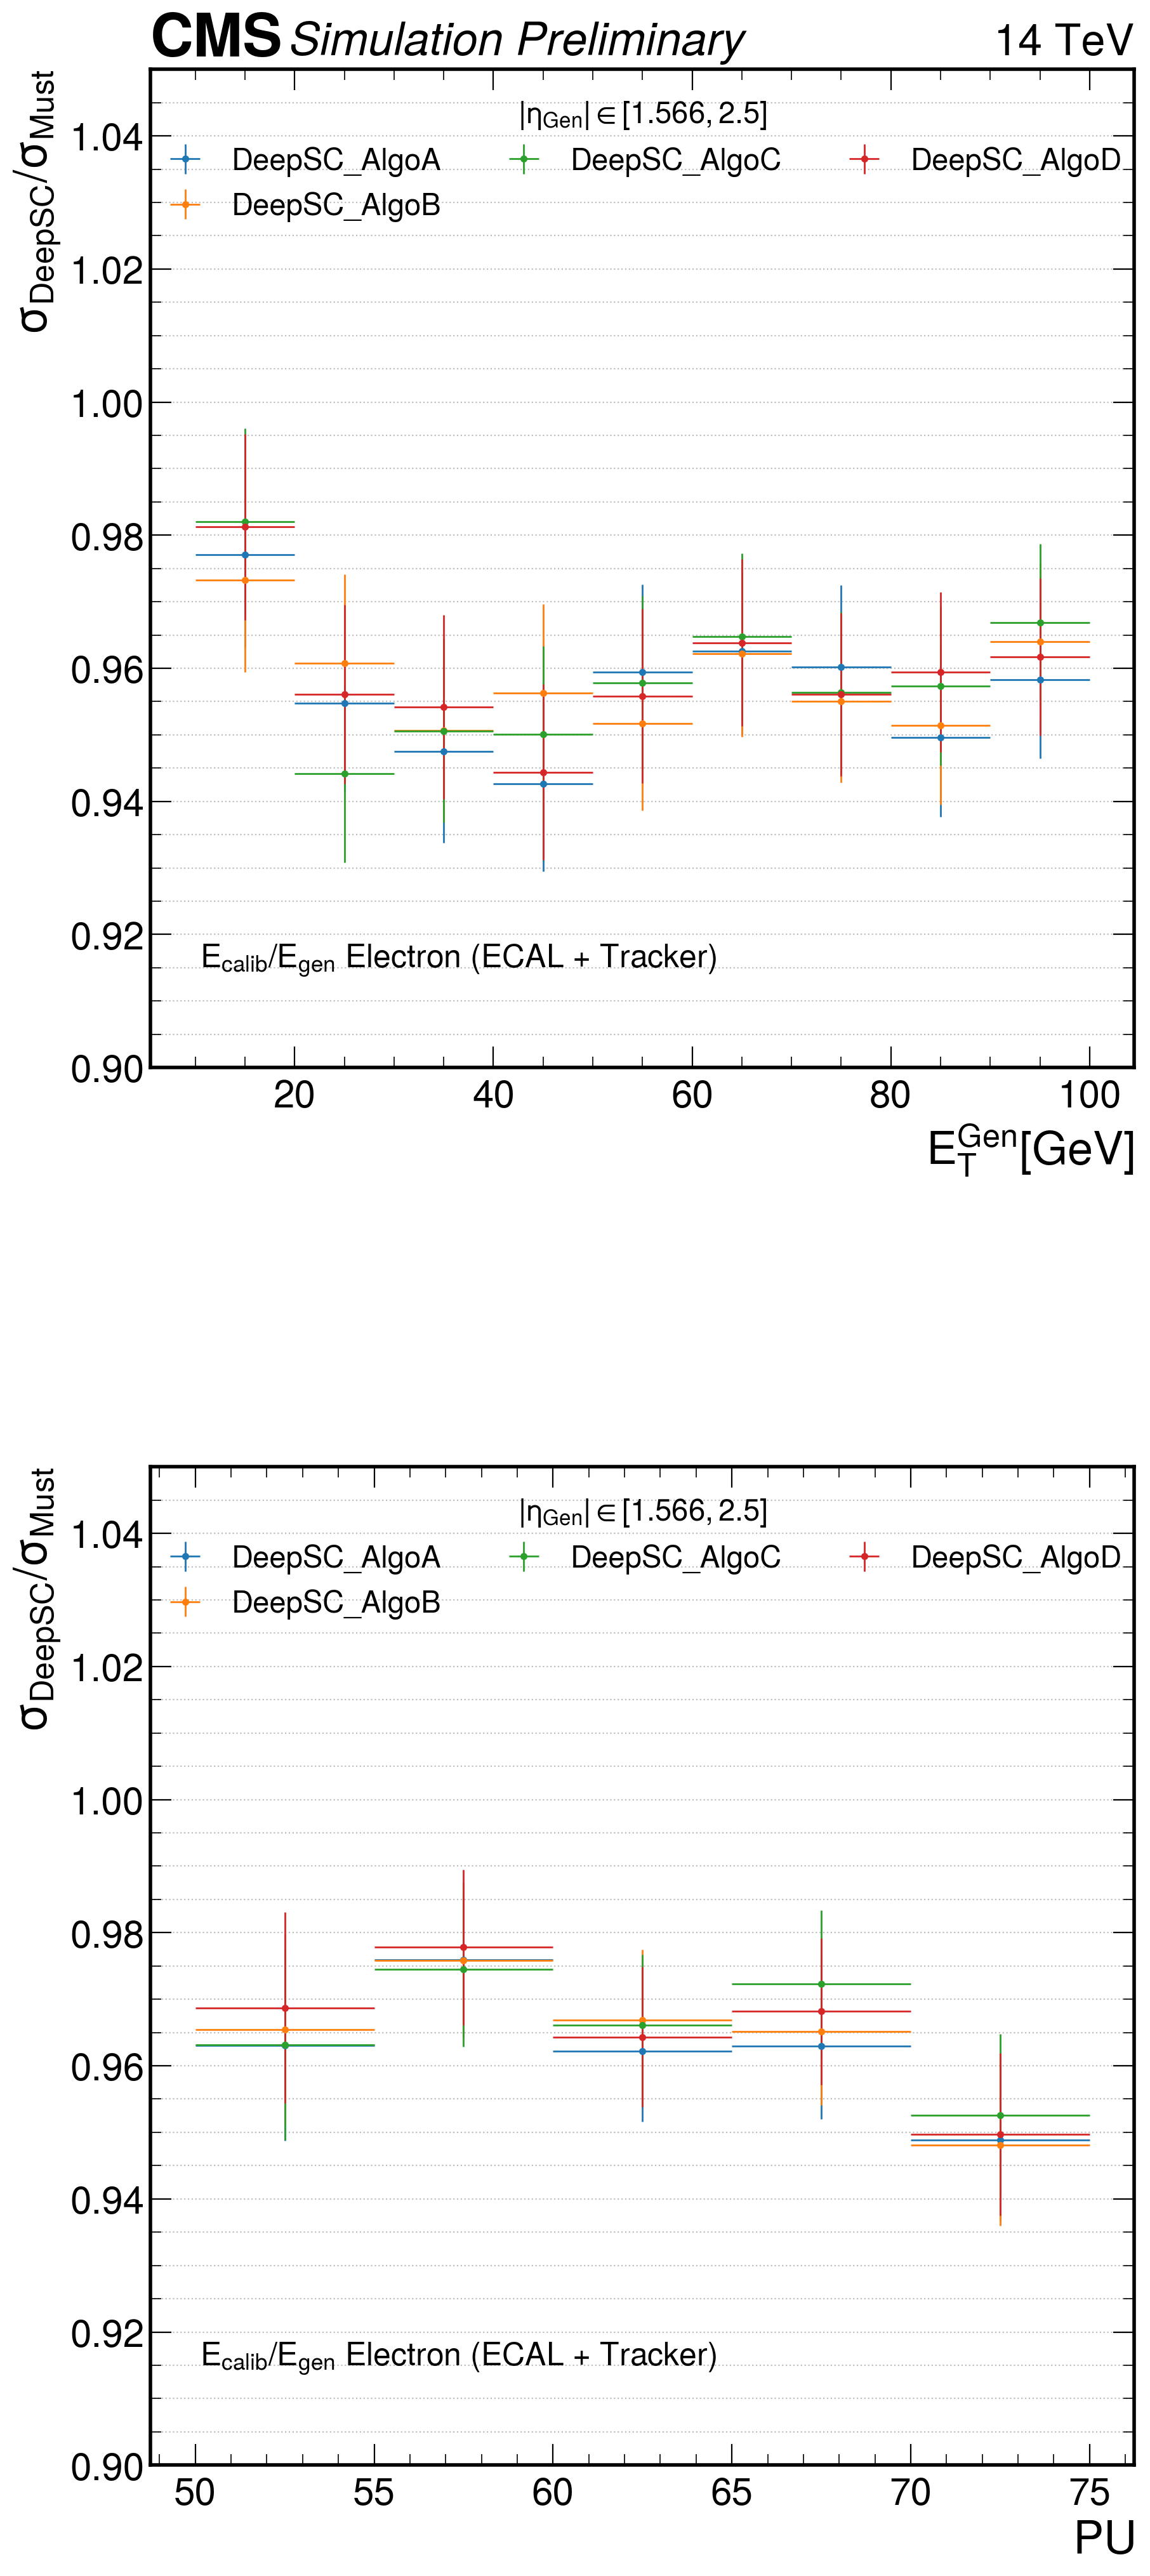

In [15]:
do_summary_plot(panels_res, output=output_folder)

In [16]:
panels_bias = panels_res[:]

for p in panels_bias:
    p['yvar'] = "m"
    p['yvar_err'] = "m_err"
    p["ylabel"] ="$\mu_{DeepSC}/\mu_{Must}$"
    p["ylims"] = [0.98, 1.02]
    
panels_bias[0]["fill_between_y"] = [0.9, 1.05]

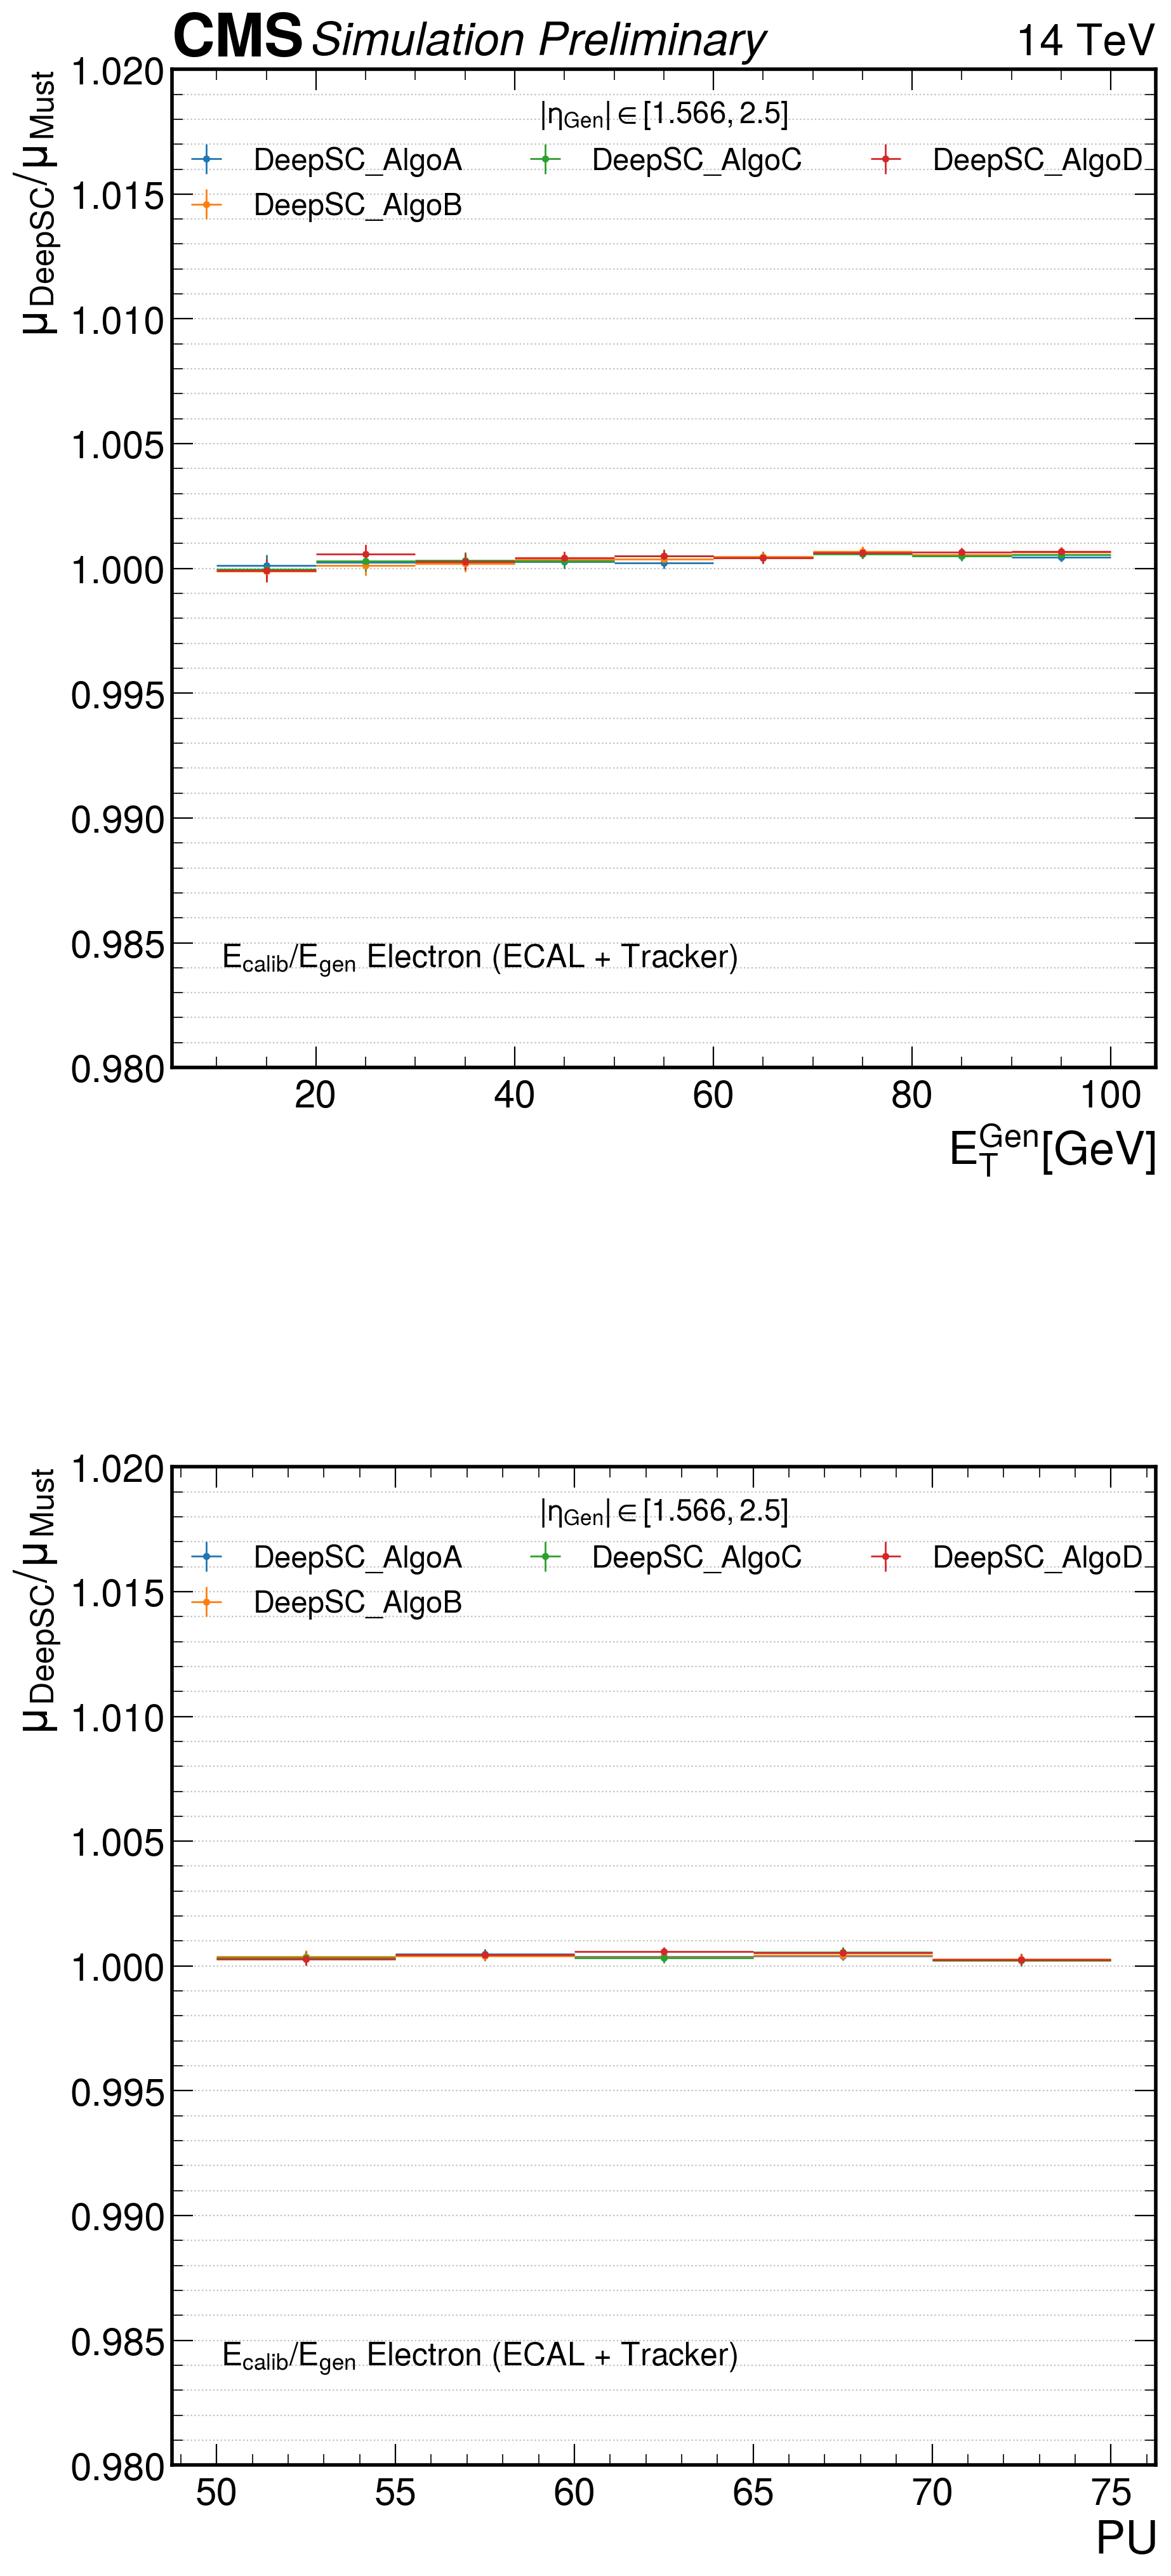

In [17]:
do_summary_plot(panels_bias, name="bias", output=output_folder)